In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
insurance= pd.read_csv("/kaggle/input/insurance/insurance.csv")

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
insurance.shape

(1338, 7)

## Point to note

- Dataset has 1338 rows and 7 columns.
- Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.

- We will analyse and finalize whether to convert them to categorical or treat as integer.

# DATA QUALITY CHECK

## Check for NULL/MISSING values

In [8]:
# percentage of missing values in each column
round(100*(insurance.isnull().sum()/len(insurance)),2).sort_values(ascending = False)

charges     0.0
region      0.0
smoker      0.0
children    0.0
bmi         0.0
sex         0.0
age         0.0
dtype: float64

In [9]:
# percentage of missing values in each row
round(100*(insurance.isnull().sum(axis=1)/len(insurance)),2).sort_values(ascending = False)[:5]

1337    0.0
439     0.0
441     0.0
442     0.0
443     0.0
dtype: float64

### Finding

- There are no missing / Null values either in columns or rows

## Duplicate Check

In [10]:
insurance_dub=insurance.copy()
# Checking for duplicates and dropping the entire duplicate row if any
insurance_dub.drop_duplicates(subset=None, inplace=True)

In [11]:
insurance_dub.shape

(1337, 7)

In [12]:
insurance.shape

(1338, 7)

### Insights

-The shape after running the drop duplicate command is same as the original dataframe.

-Hence we can conclude that there were zero duplicate values in the dataset.

## Data Cleaning
- Checking value_counts() for entire dataframe.

- This will help to identify any Unknow/Junk values present in the dataset.

In [13]:
for col in insurance:
    print(insurance[col].value_counts(ascending=False), '\n\n\n')

18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64 



male      676
female    662
Name: sex, dtype: int64 



32.300    13
28.310     9
31.350     8
30.800     8
30.875     8
          ..
20.100     1
29.545     1
37.900     1
25.520     1
24.090     1
Name: bmi, Length: 548, dtype: int64 



0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64 



no     1064
yes     274
Name: smoker, dtype: int64 



southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64 



1639.56310     2
8825.08600     1
43254.41795    1
5257.50795     1


### Insights
- There seems to be no Junk/Unknown values in the entire dataset.

## Creating Dummy Variables

- We will create DUMMY variables for 4 categorical variables 'sex','children','smoker' & 'region'.

- Before creating dummy variables, we will have to convert them into 'category' data types.

In [14]:
# Check the datatypes before convertion
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
# Convert to 'category' data type

insurance['sex']=insurance['sex'].astype('category')
insurance['smoker']=insurance['smoker'].astype('category')
insurance['children']=insurance['children'].astype('category')
insurance['region']=insurance['region'].astype('category')

In [16]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

insurance_new = pd.get_dummies(insurance, drop_first=True)
insurance_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   charges           1338 non-null   float64
 3   sex_male          1338 non-null   uint8  
 4   children_1        1338 non-null   uint8  
 5   children_2        1338 non-null   uint8  
 6   children_3        1338 non-null   uint8  
 7   children_4        1338 non-null   uint8  
 8   children_5        1338 non-null   uint8  
 9   smoker_yes        1338 non-null   uint8  
 10  region_northwest  1338 non-null   uint8  
 11  region_southeast  1338 non-null   uint8  
 12  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(1), uint8(10)
memory usage: 44.6 KB


In [17]:
insurance_new.shape

(1338, 13)

# SPLITTING THE DATA
- Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio)
- We will use train_test_split method from sklearn package for this

In [18]:

# Check the shape before spliting

insurance_new.shape

(1338, 13)

In [19]:
# Check the info before spliting

insurance_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   charges           1338 non-null   float64
 3   sex_male          1338 non-null   uint8  
 4   children_1        1338 non-null   uint8  
 5   children_2        1338 non-null   uint8  
 6   children_3        1338 non-null   uint8  
 7   children_4        1338 non-null   uint8  
 8   children_5        1338 non-null   uint8  
 9   smoker_yes        1338 non-null   uint8  
 10  region_northwest  1338 non-null   uint8  
 11  region_southeast  1338 non-null   uint8  
 12  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(1), uint8(10)
memory usage: 44.6 KB


In [20]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(insurance_new, train_size = 0.70, test_size = 0.30, random_state = 100)

- Verify the info and shape of the dataframes after split:

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 966 to 792
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               936 non-null    int64  
 1   bmi               936 non-null    float64
 2   charges           936 non-null    float64
 3   sex_male          936 non-null    uint8  
 4   children_1        936 non-null    uint8  
 5   children_2        936 non-null    uint8  
 6   children_3        936 non-null    uint8  
 7   children_4        936 non-null    uint8  
 8   children_5        936 non-null    uint8  
 9   smoker_yes        936 non-null    uint8  
 10  region_northwest  936 non-null    uint8  
 11  region_southeast  936 non-null    uint8  
 12  region_southwest  936 non-null    uint8  
dtypes: float64(2), int64(1), uint8(10)
memory usage: 38.4 KB


In [22]:
df_train.shape

(936, 13)

In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 12 to 1164
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               402 non-null    int64  
 1   bmi               402 non-null    float64
 2   charges           402 non-null    float64
 3   sex_male          402 non-null    uint8  
 4   children_1        402 non-null    uint8  
 5   children_2        402 non-null    uint8  
 6   children_3        402 non-null    uint8  
 7   children_4        402 non-null    uint8  
 8   children_5        402 non-null    uint8  
 9   smoker_yes        402 non-null    uint8  
 10  region_northwest  402 non-null    uint8  
 11  region_southeast  402 non-null    uint8  
 12  region_southwest  402 non-null    uint8  
dtypes: float64(2), int64(1), uint8(10)
memory usage: 16.5 KB


In [24]:
df_test.shape

(402, 13)

# EXPLORATORY DATA ANALYSIS
-We need to perform the EDA on TRAINING (df_train) Dataset.
## Visualising Numeric Variables
- Let's make a pairplot of all the numeric variables.

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 966 to 792
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               936 non-null    int64  
 1   bmi               936 non-null    float64
 2   charges           936 non-null    float64
 3   sex_male          936 non-null    uint8  
 4   children_1        936 non-null    uint8  
 5   children_2        936 non-null    uint8  
 6   children_3        936 non-null    uint8  
 7   children_4        936 non-null    uint8  
 8   children_5        936 non-null    uint8  
 9   smoker_yes        936 non-null    uint8  
 10  region_northwest  936 non-null    uint8  
 11  region_southeast  936 non-null    uint8  
 12  region_southwest  936 non-null    uint8  
dtypes: float64(2), int64(1), uint8(10)
memory usage: 38.4 KB


In [26]:
df_train.columns

Index(['age', 'bmi', 'charges', 'sex_male', 'children_1', 'children_2',
       'children_3', 'children_4', 'children_5', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

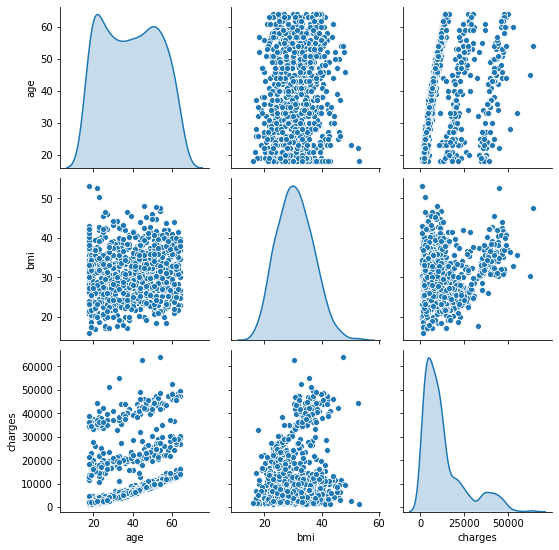

In [27]:
# Create a new dataframe of only numeric variables:

insurance_num=df_train[[ 'age', 'bmi', 'charges']]

sns.pairplot(insurance_num, diag_kind='kde')
plt.show()

## Insights
- The above Pair-Plot tells us that there is a LINEAR RELATION between 'age','bmi' and 'charges'

## Visualising Catagorical Variables

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 966 to 792
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               936 non-null    int64  
 1   bmi               936 non-null    float64
 2   charges           936 non-null    float64
 3   sex_male          936 non-null    uint8  
 4   children_1        936 non-null    uint8  
 5   children_2        936 non-null    uint8  
 6   children_3        936 non-null    uint8  
 7   children_4        936 non-null    uint8  
 8   children_5        936 non-null    uint8  
 9   smoker_yes        936 non-null    uint8  
 10  region_northwest  936 non-null    uint8  
 11  region_southeast  936 non-null    uint8  
 12  region_southwest  936 non-null    uint8  
dtypes: float64(2), int64(1), uint8(10)
memory usage: 78.4 KB


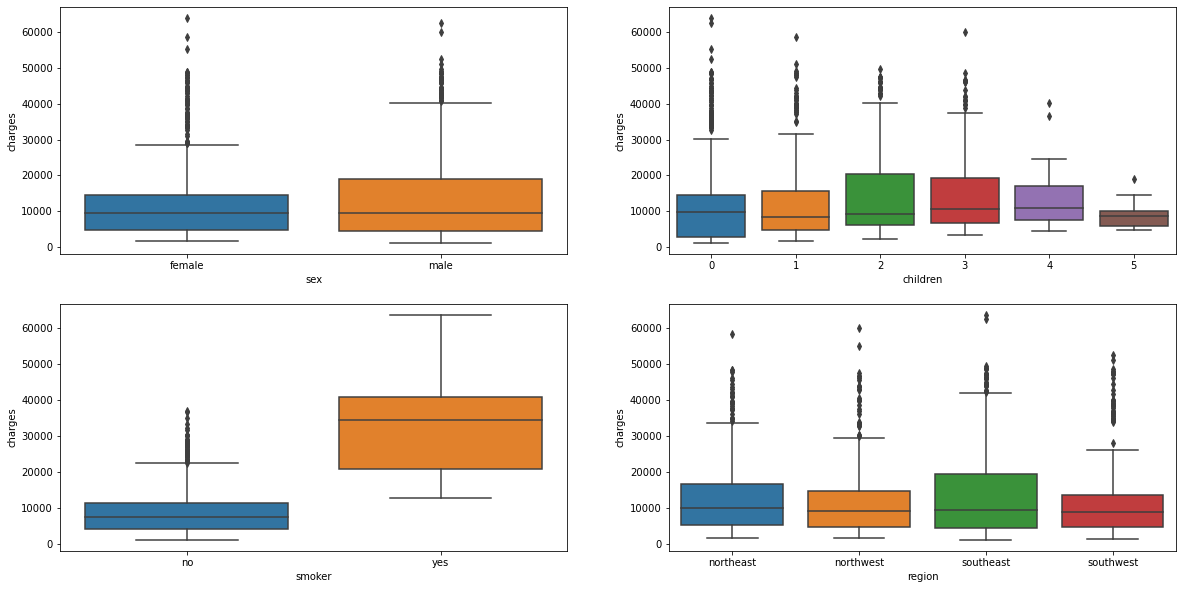

In [29]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
sns.boxplot(x = 'sex', y = 'charges', data = insurance)
plt.subplot(2,2,2)
sns.boxplot(x = 'children', y = 'charges', data = insurance)
plt.subplot(2,2,3)
sns.boxplot(x = 'smoker', y = 'charges', data = insurance)
plt.subplot(2,2,4)
sns.boxplot(x = 'region', y = 'charges', data = insurance)
plt.show()

# Insights
There were  4 categorical variables in the dataset.

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘charges’) .

The inference that We could derive were:

- **sex**: data is bit baised towards male , data is represented as 50.5 : 49.5 for male: female . Interquartile range for male is higher compared  to interquartile range for female.

- **smoker**: 20.5 % of our data are smoker. Median for Smokers are quite high compared to people who don't smoke.

- **Children** : People have 2 children are having highest data  distribution  between 50 percentile to 75 percentile among all others.
- **Region** : Region as Souteast are having highest data  distribution  between 50 percentile to 75 percentile among all others.

## Correlation Matrix

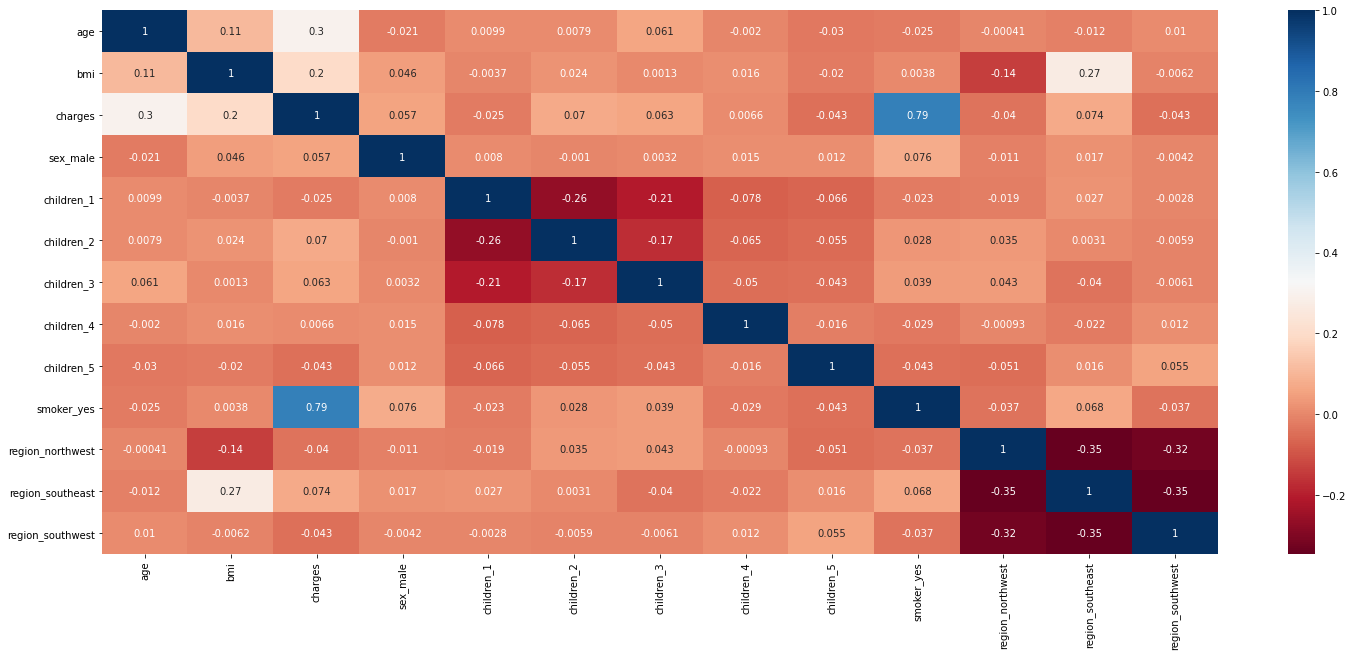

In [30]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: insurance_new) that were chosen for analysis

plt.figure(figsize = (25,10))
sns.heatmap(insurance_new.corr(), annot = True, cmap="RdBu")
plt.show()

## Insights:
- The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
- We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

# RESCALING THE FEATURES

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler= MinMaxScaler()

In [33]:
df_train.head()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
966,51,24.795,23967.38305,1,0,1,0,0,0,1,1,0,0
522,51,33.915,9866.30485,0,0,0,0,0,0,0,0,0,0
155,44,39.520,6948.70080,1,0,0,0,0,0,0,1,0,0
671,29,31.160,3943.59540,0,0,0,0,0,0,0,0,0,0
1173,38,29.260,6457.84340,1,0,1,0,0,0,0,1,0,0


In [34]:
df_train.columns

Index(['age', 'bmi', 'charges', 'sex_male', 'children_1', 'children_2',
       'children_3', 'children_4', 'children_5', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [35]:
# Apply scaler() to all the numeric variables

num_vars = ['age', 'bmi', 'charges']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [36]:
# Checking values after scaling
df_train.head()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
966,0.717391,0.237692,0.364661,1,0,1,0,0,0,1,1,0,0
522,0.717391,0.483051,0.139579,0,0,0,0,0,0,0,0,0,0
155,0.565217,0.633844,0.093008,1,0,0,0,0,0,0,1,0,0
671,0.239130,0.408932,0.045040,0,0,0,0,0,0,0,0,0,0
1173,0.434783,0.357815,0.085173,1,0,1,0,0,0,0,1,0,0


In [37]:
df_train.describe()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.458171,0.399088,0.192301,0.497863,0.236111,0.184829,0.117521,0.021368,0.011752,0.194444,0.244658,0.282051,0.242521
std,0.306065,0.167115,0.193690,0.500263,0.424918,0.388366,0.322213,0.144683,0.107826,0.395984,0.430114,0.450239,0.428837
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.277441,0.055033,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.456522,0.391176,0.129662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.717391,0.512039,0.245247,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# BUILDING A LINEAR MODEL

## Dividing into X and Y sets for the model building

In [38]:
y_train = df_train.pop('charges')
X_train = df_train

### RFE
Recursive feature elimination: We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [39]:
#Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [40]:
# Running RFE with the output number of the variable equal to 6
lm= LinearRegression()
lm.fit(X_train,y_train)
rfe= RFE(lm,6)
rfe=rfe.fit(X_train,y_train)

In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('age', True, 1),
 ('bmi', True, 1),
 ('sex_male', False, 7),
 ('children_1', False, 6),
 ('children_2', True, 1),
 ('children_3', False, 2),
 ('children_4', True, 1),
 ('children_5', True, 1),
 ('smoker_yes', True, 1),
 ('region_northwest', False, 5),
 ('region_southeast', False, 4),
 ('region_southwest', False, 3)]

In [42]:
col=X_train.columns[rfe.support_]
col

Index(['age', 'bmi', 'children_2', 'children_4', 'children_5', 'smoker_yes'], dtype='object')

In [43]:
X_train.columns[~rfe.support_]

Index(['sex_male', 'children_1', 'children_3', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [44]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


# Building Linear Model using 'STATS MODEL'

## Model 1

### VIF

In [45]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bmi,2.98
0,age,2.72
2,children_2,1.22
5,smoker_yes,1.21
3,children_4,1.03
4,children_5,1.01


In [46]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [47]:
# Check the parameters obtained

lr1.params

const        -0.040999
age           0.191584
bmi           0.164643
children_2    0.023215
children_4    0.037126
children_5    0.023905
smoker_yes    0.382881
dtype: float64

In [48]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     432.9
Date:                Tue, 07 May 2024   Prob (F-statistic):          4.75e-265
Time:                        18:02:24   Log-Likelihood:                 833.09
No. Observations:                 936   AIC:                            -1652.
Df Residuals:                     929   BIC:                            -1618.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0410      0.010     -4.281      0.0

## Model 2
- Removing the variable 'children_5' based on its High p-value 

In [49]:
X_train_new = X_train_rfe.drop(["children_5"], axis = 1)

### VIF

In [50]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
1,bmi,2.96
0,age,2.72
2,children_2,1.22
4,smoker_yes,1.21
3,children_4,1.03


In [51]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [52]:
# Check the parameters obtained

lr2.params

const        -0.040320
age           0.191246
bmi           0.164374
children_2    0.022882
children_4    0.036765
smoker_yes    0.382538
dtype: float64

In [53]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     519.6
Date:                Tue, 07 May 2024   Prob (F-statistic):          2.70e-266
Time:                        18:02:26   Log-Likelihood:                 832.78
No. Observations:                 936   AIC:                            -1654.
Df Residuals:                     930   BIC:                            -1625.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0403      0.010     -4.228      0.0

## Model 3

- Removing the variable 'children_4' based on its High p-value

In [54]:
X_train_new = X_train_new.drop(["children_4"], axis = 1)

### VIF

In [55]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bmi,2.94
0,age,2.72
2,children_2,1.21
3,smoker_yes,1.21


In [56]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [57]:
# Check the parameters obtained

lr3.params

const        -0.039554
age           0.191229
bmi           0.164988
children_2    0.021915
smoker_yes    0.382340
dtype: float64

In [58]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     647.7
Date:                Tue, 07 May 2024   Prob (F-statistic):          3.73e-267
Time:                        18:02:28   Log-Likelihood:                 831.45
No. Observations:                 936   AIC:                            -1653.
Df Residuals:                     931   BIC:                            -1629.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0396      0.010     -4.149      0.0

## Model 4
- Removing the variable 'children_2' based on its High p-value

In [59]:
X_train_new = X_train_new.drop(["children_2"], axis = 1)

### VIF

In [60]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bmi,2.83
0,age,2.70
2,smoker_yes,1.21


In [61]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [62]:
# Check the parameters obtained

lr4.params

const        -0.036612
age           0.191829
bmi           0.166761
smoker_yes    0.382986
dtype: float64

In [63]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     856.0
Date:                Tue, 07 May 2024   Prob (F-statistic):          3.43e-267
Time:                        18:02:30   Log-Likelihood:                 828.06
No. Observations:                 936   AIC:                            -1648.
Df Residuals:                     932   BIC:                            -1629.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0366      0.009     -3.856      0.0

### Insights
- This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

# Final Model Interpretation

## Hypothesis Testing:

### Hypothesis testing states that:

H0:B1=B2=...=Bn=0
H1: at least one Bi!=0

### lr4 model coefficient values
- const -0.0415

- bmi            0.1779     
- smoker_yes     0.3833     
- age  0.1950

## Insights
- From the lr4 model summary, it is evident that all our coefficients are not equal to zero which means We REJECT the NULL HYPOTHESIS

### F Statistics

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- **F-statistic**:                     895.7
- **Prob (F-statistic)**:          7.80e-274
The F-Statistics value of 2895.7 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

### The equation of best fitted surface based on model lr4:
charges = -0.0415  + (**age**  × 0.1950) + (**bmi** × 0.1779) + (**smoker_yes** × 0.3833 ) 

### Interpretation of Coefficients:
- **age**: A coefficient value of ‘0.1950’ indicated that a unit increase in age variable, increases the charge numbers by 0.1950 units.
- **bmi**: A coefficient value of ‘0.1779’ indicated that a unit increase in bmi variable, increases the charge numbers by 0.1779 units.
- **smoker_yes**: A coefficient value of ‘0.3833’ indicated that a unit increase in smoker_yes variable, increases the charge numbers by 0.3833 units.



# ASSUMPTIONS

## Error terms are normally distributed with mean zero (not X, Y)
- Residual Analysis Of Training Data

In [64]:
y_train_pred = lr4.predict(X_train_lm4)

Text(0.5, 0, 'Errors')

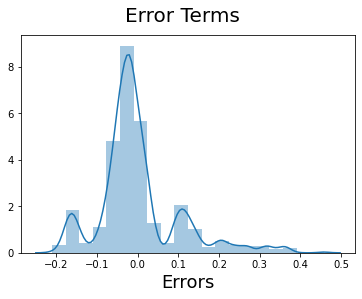

In [65]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

### Insights
- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

## There is a linear relationship between X and Y

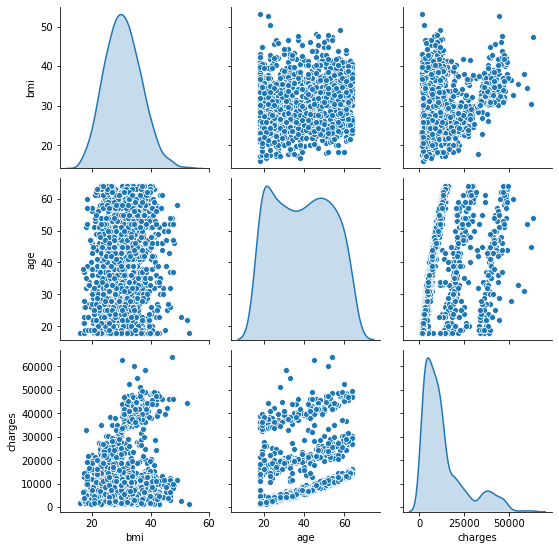

In [66]:
insurance_new=insurance_new[[ 'bmi', 'age', 'charges']]

sns.pairplot(insurance_new, diag_kind='kde')
plt.show()

### Insight
- Using the pair plot, we could see there is a linear relation between bmi and age variable with the predictor ‘charges’.

## There is No Multicollinearity between the predictor variables

In [67]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bmi,2.83
0,age,2.70
2,smoker_yes,1.21


### Insight
- From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 

# MAKING PREDICTION USING FINAL MODEL

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr4)

### Applying the scaling on the test sets

In [68]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['age', 'bmi', 'charges']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [69]:
df_test.head()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
12,0.108696,0.496099,0.011253,1,0,0,0,0,0,0,0,0,1
306,0.217391,0.310465,0.304170,0,0,1,0,0,0,0,0,0,1
318,0.565217,0.314366,0.100550,0,0,0,0,0,0,0,1,0,0
815,0.043478,0.417003,0.012068,0,0,0,0,0,0,0,0,1,0
157,0.000000,0.247915,0.229795,1,0,0,0,0,0,1,0,0,0


In [70]:
df_test.describe()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,0.467662,0.387383,0.197677,0.522388,0.256219,0.166667,0.116915,0.012438,0.017413,0.228856,0.238806,0.248756,0.243781
std,0.304236,0.156621,0.192579,0.500121,0.437088,0.373142,0.321720,0.110967,0.130967,0.420620,0.426885,0.432831,0.429897
min,0.000000,0.023002,0.000154,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.278585,0.060686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.478261,0.383105,0.138259,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.733696,0.483051,0.254641,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.890503,0.940158,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [71]:
y_test = df_test.pop('charges')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 12 to 1164
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               402 non-null    float64
 1   bmi               402 non-null    float64
 2   sex_male          402 non-null    uint8  
 3   children_1        402 non-null    uint8  
 4   children_2        402 non-null    uint8  
 5   children_3        402 non-null    uint8  
 6   children_4        402 non-null    uint8  
 7   children_5        402 non-null    uint8  
 8   smoker_yes        402 non-null    uint8  
 9   region_northwest  402 non-null    uint8  
 10  region_southeast  402 non-null    uint8  
 11  region_southwest  402 non-null    uint8  
dtypes: float64(2), uint8(10)
memory usage: 13.3 KB


In [72]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm4 = sm.add_constant(X_test)
X_test_lm4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 12 to 1164
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       402 non-null    float64
 1   age         402 non-null    float64
 2   bmi         402 non-null    float64
 3   smoker_yes  402 non-null    uint8  
dtypes: float64(3), uint8(1)
memory usage: 13.0 KB


In [73]:
# Making predictions using the final model (lr4)

y_pred = lr4.predict(X_test_lm4)


# MODEL EVALUATION

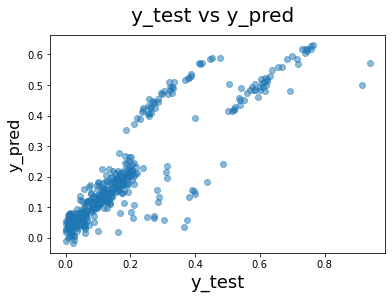

In [74]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

## R^2 Value for TEST

In [75]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7777782410843158

## Adjusted R^2 Value for TEST

In [76]:
# We already have the value of R^2 (calculated in above step)

r2=0.75783003115855

In [77]:
# Get the shape of X_test
X_test.shape

(402, 3)

In [78]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7560046293833631

## Final Result Comparison

- **Train R^2** :0.743
- **Train Adjusted R^2** : 0.742
- **Test R^2** :0.757
- **Test Adjusted R^2** :0.756

This seems to be a really good model that can very well 'Generalize' various datasets.

# FINAL REPORT

As per our final Model, the top predictor variables that influences the Charges are:
- **age**: A coefficient value of ‘0.1950’ indicated that a unit increase in age variable, increases the charge numbers by 0.1950 units.
- **bmi**: A coefficient value of ‘0.1779’ indicated that a unit increase in bmi variable, increases the charge numbers by 0.1779 units.
- **smoker_yes**: A coefficient value of ‘0.3833’ indicated that a unit increase in smoker_yes variable, increases the charge numbers by 0.3833 units.

